In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [70]:
#dataset = pd.read_csv('/content/drive/MyDrive/kaggle/parkinsons.data')
dataset = pd.read_csv("/kaggle/input/parkinsons-disease-data-set/parkinsons.data", sep=',', index_col='name')

In [71]:
dataset.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [72]:
dataset.shape

(195, 23)

In [73]:
x = dataset.iloc[: , np.r_[0:16, 17:23]].values
y = dataset.iloc[: , 16].values

In [74]:
print(x)
dataset.shape

[[119.992  157.302   74.997  ...   0.2665   2.3014   0.2847]
 [122.4    148.65   113.819  ...   0.3356   2.4869   0.3687]
 [116.682  131.111  111.555  ...   0.3112   2.3423   0.3326]
 ...
 [174.688  240.005   74.287  ...   0.1585   2.6798   0.1317]
 [198.764  396.961   74.904  ...   0.2075   2.1386   0.1233]
 [214.289  260.277   77.973  ...   0.1907   2.5555   0.1486]]


(195, 23)

In [75]:
x.shape

(195, 22)

In [76]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[0])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [77]:
x.shape[1]

22

# splitting dataset

In [78]:

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
# x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

In [79]:
print(y_train)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1]


In [80]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
print(x_train)

[[158.219  442.557   71.948  ...   0.2733   2.6408   0.1701]
 [152.125  161.469   76.596  ...   0.1735   2.0801   0.1608]
 [174.688  240.005   74.287  ...   0.1585   2.6798   0.1317]
 ...
 [176.824  215.293   83.961  ...   0.2816   2.6557   0.2348]
 [176.17   185.604  163.564  ...   0.1964   2.5365   0.1732]
 [184.055  196.537  166.977  ...   0.0634   2.3615   0.1157]]


In [81]:
sc = StandardScaler()
# x_train[:,195:] = sc.fit_transform(x_train[:,195:])
# x_test[:,195:] = sc.transform(x_test[:,195:])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [82]:
x_train

array([[ 0.0431,  2.5875, -1.0289, ...,  0.5066,  0.6203, -0.4291],
       [-0.1042, -0.4095, -0.9232, ..., -0.6348, -0.7939, -0.53  ],
       [ 0.4411,  0.4279, -0.9758, ..., -0.8071,  0.7186, -0.8457],
       ...,
       [ 0.4927,  0.1644, -0.7558, ...,  0.602 ,  0.658 ,  0.2732],
       [ 0.4769, -0.1521,  1.0544, ..., -0.3733,  0.3573, -0.3953],
       [ 0.6675, -0.0356,  1.132 , ..., -1.8945, -0.0841, -1.0193]])

In [83]:
def cm_displayer(cm):
  # Create a DataFrame from the confusion matrix.
  cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

  plt.figure(figsize=(10,7))

  # Create a heatmap from the DataFrame.
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

# KNN

In [84]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train,y_train)

KNN_model_filename = "KNN_model.pkl"

with open(KNN_model_filename,"wb") as file:
  pickle.dump(knn_classifier,file)

In [85]:
y_pred = knn_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


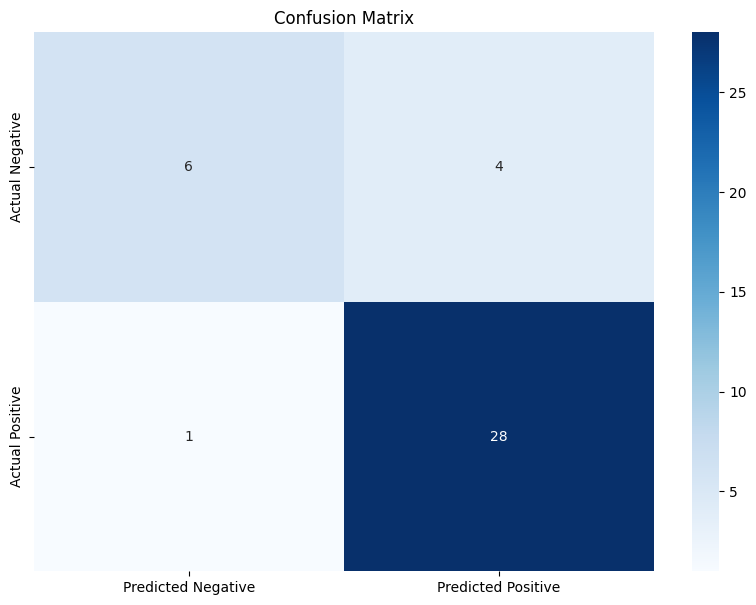

In [86]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# SVM

In [87]:
svm_classifier = SVC(kernel = 'linear',random_state = 0)
svm_classifier.fit(x_train,y_train)

SVM_model_filename = "SVM_model.pkl"

with open(SVM_model_filename,"wb") as file:
  pickle.dump(svm_classifier,file)

In [88]:
y_pred = svm_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8205128205128205


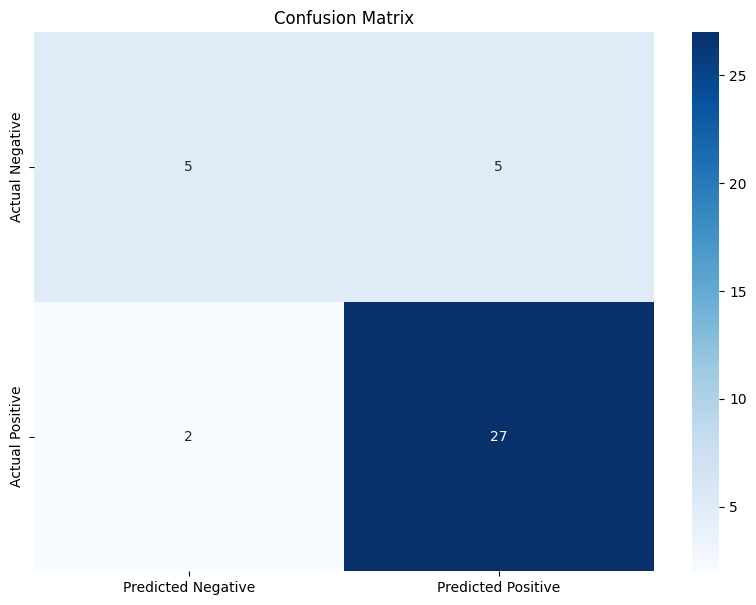

In [89]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

Decision Tree

# Decison Tree

In [90]:
dt_classifier = DecisionTreeClassifier(max_depth = 2 , random_state = 1)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

dt_classifier.fit(x_train, y_train)

dt_model_filename = "DT_model.pkl"

with open(dt_model_filename,"wb") as file:
  pickle.dump(dt_classifier,file)

In [91]:
y_pred = dt_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8461538461538461


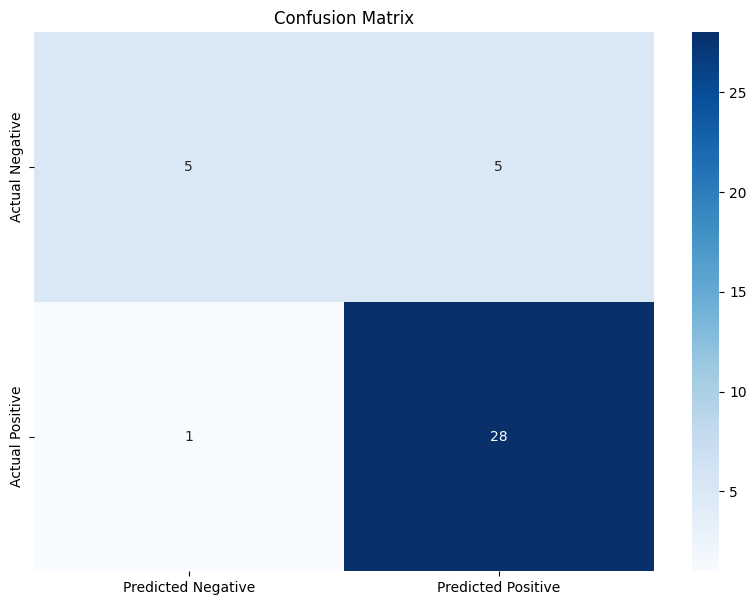

In [92]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Bagging

In [93]:
dt_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1 )

bc_classifier = BaggingClassifier(estimator = dt_classifier , n_estimators = 300, n_jobs= -1 , random_state=1)

bc_classifier.fit(x_train,y_train)

bc_model_filename = "BC_model.pkl"

with open(bc_model_filename,"wb") as file:
  pickle.dump(bc_classifier,file)

In [94]:
y_pred = bc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


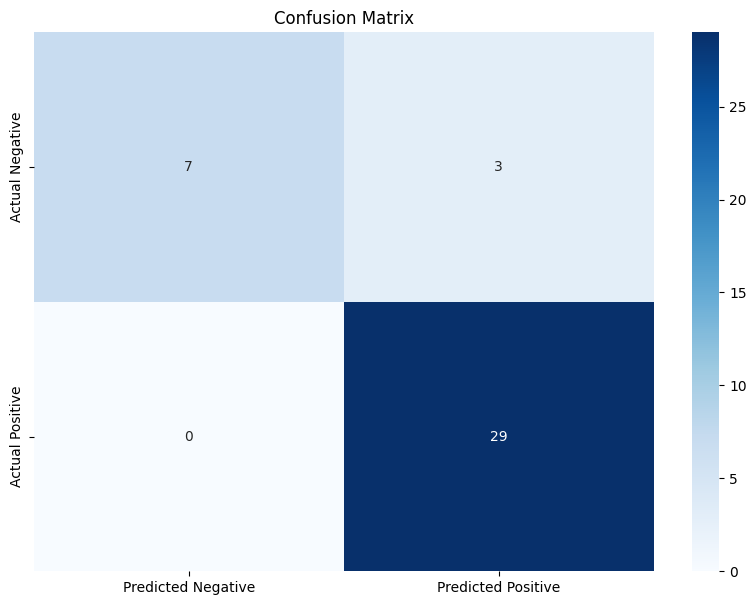

In [95]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [96]:
col = list(dataset.columns)
col.remove('status')
print(col)


['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


# Lightgbm

In [97]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=1)

lgbm_classifier.fit(x_train,y_train)

lgbm_model_filename = "LGBM_model.pkl"

with open(lgbm_model_filename,"wb") as file:
  pickle.dump(lgbm_classifier,file)

In [98]:
y_pred = lgbm_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


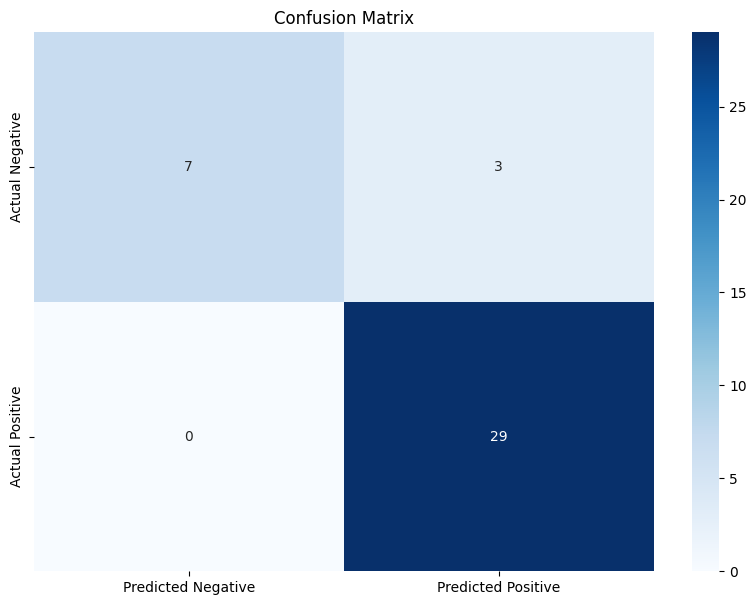

In [99]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Ada Boost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

abc_classifier = AdaBoostClassifier(n_estimators=50)

abc_classifier.fit(x_train,y_train)

abc_model_filename = "ABC_model.pkl"

with open(abc_model_filename,"wb") as file:
  pickle.dump(abc_classifier,file)

In [101]:
y_pred = abc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


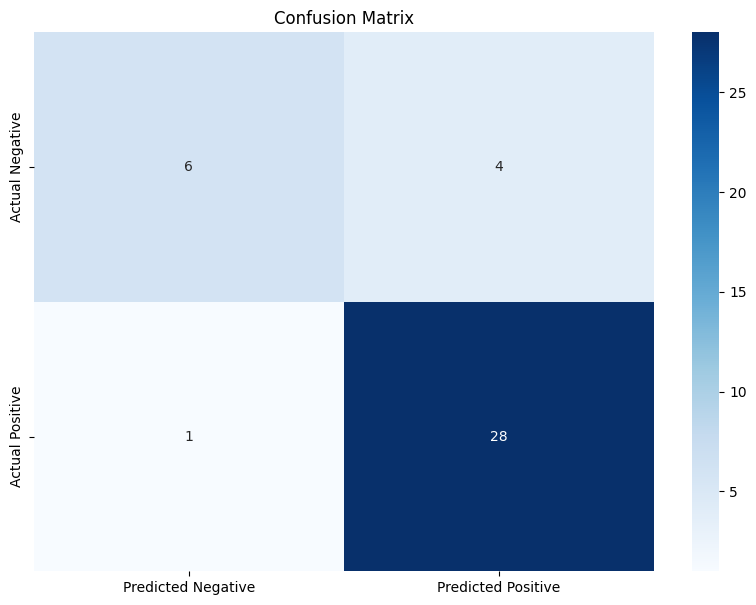

In [102]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

rf_classifier.fit(x_train,y_train)

rf_model_filename = "RF_model.pkl"

with open(rf_model_filename,"wb") as file:
  pickle.dump(rf_classifier,file)

In [104]:
y_pred = rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


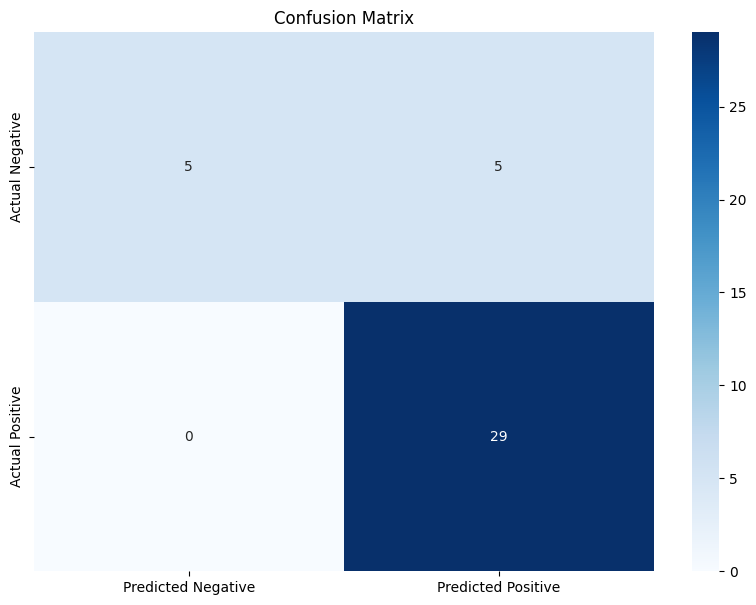

In [105]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

XGBoost

In [106]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(x_train,y_train)

xgb_model_filename = "XG_model.pkl"

with open(xgb_model_filename,"wb") as file:
  pickle.dump(xgb_classifier,file)

In [107]:
y_pred = xgb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


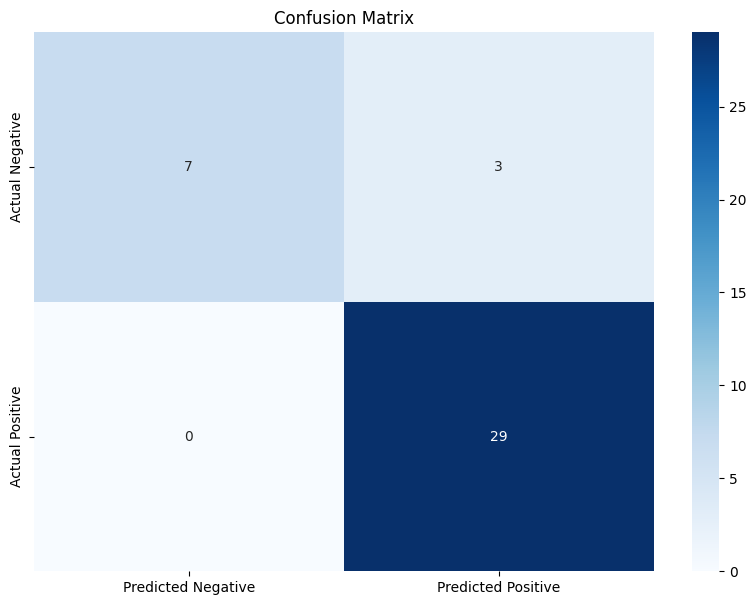

In [108]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)


# PCA Random Forests

In [109]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)

pca = PCA(n_components = 9)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca_rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

pca_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)

In [110]:
y_pred = pca_rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8974358974358975


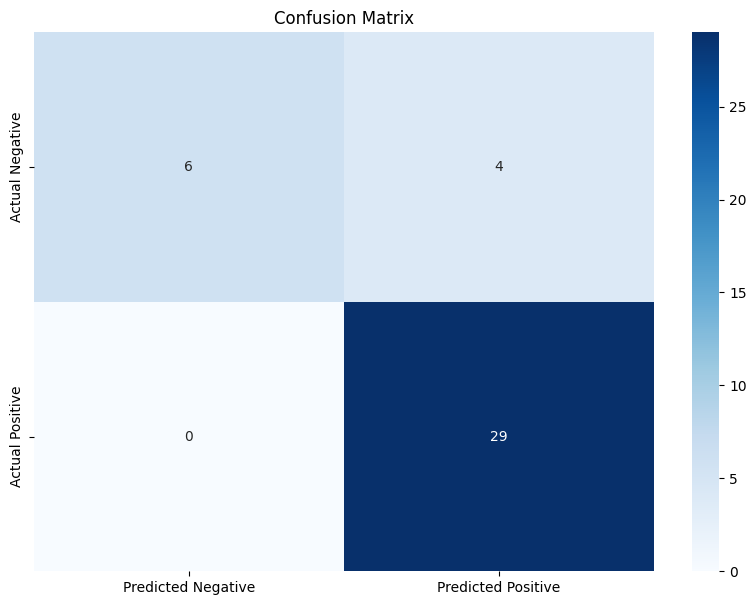

In [111]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Accuracy , Precision , Recall And F1Score

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [113]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
x_test = sc.fit_transform(x_test)

In [114]:
# def metric_printer(classifier):
#     y_pred = classifier.predict(x_test)
#     print("Classifier: ", classifier.__class__.__name__)
#     print("accuracy:" ,accuracy_score(y_test, y_pred))
#     print("Precision: ", precision_score(y_test, y_pred))
#     print("Recall: ", recall_score(y_test, y_pred))
#     print("F1 Score: ", f1_score(y_test, y_pred))
#     print('____________________________________')


In [115]:
import matplotlib.pyplot as plt

results = {}

def metric_printer(classifier):
    y_pred = classifier.predict(x_test)
    classifier_name = classifier.__class__.__name__
    print("Classifier: ", classifier_name)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision: ", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall: ", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)
    print('____________________________________')

    results[classifier_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}




In [116]:
metric_printer(svm_classifier)
metric_printer(rf_classifier)
metric_printer(knn_classifier)
metric_printer(xgb_classifier)

Classifier:  SVC
Accuracy:  0.8205128205128205
Precision:  0.84375
Recall:  0.9310344827586207
F1 Score:  0.8852459016393444
____________________________________
Classifier:  RandomForestClassifier
Accuracy:  0.8717948717948718
Precision:  0.8529411764705882
Recall:  1.0
F1 Score:  0.9206349206349206
____________________________________
Classifier:  KNeighborsClassifier
Accuracy:  0.8717948717948718
Precision:  0.875
Recall:  0.9655172413793104
F1 Score:  0.9180327868852458
____________________________________
Classifier:  XGBClassifier
Accuracy:  0.9230769230769231
Precision:  0.90625
Recall:  1.0
F1 Score:  0.9508196721311475
____________________________________


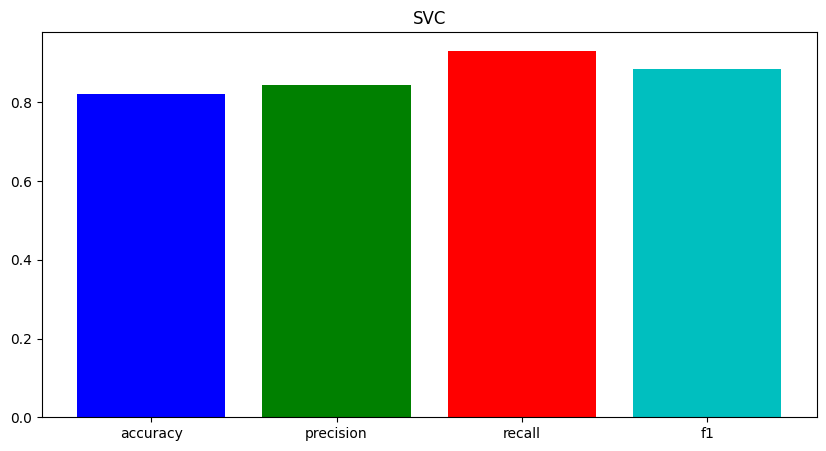

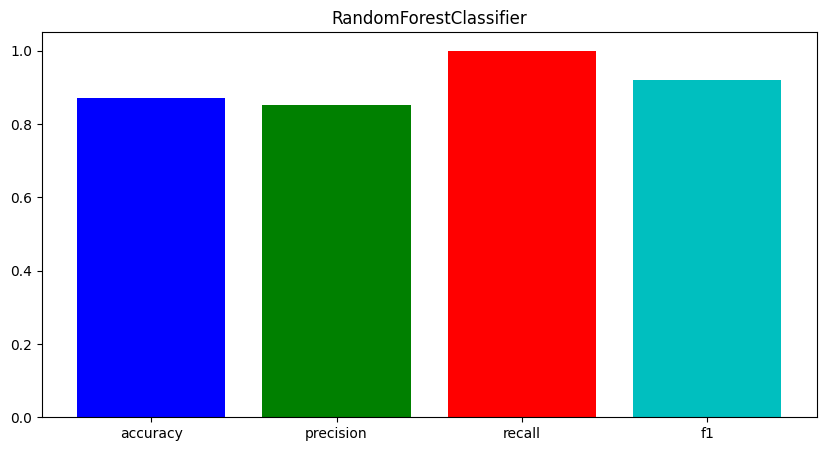

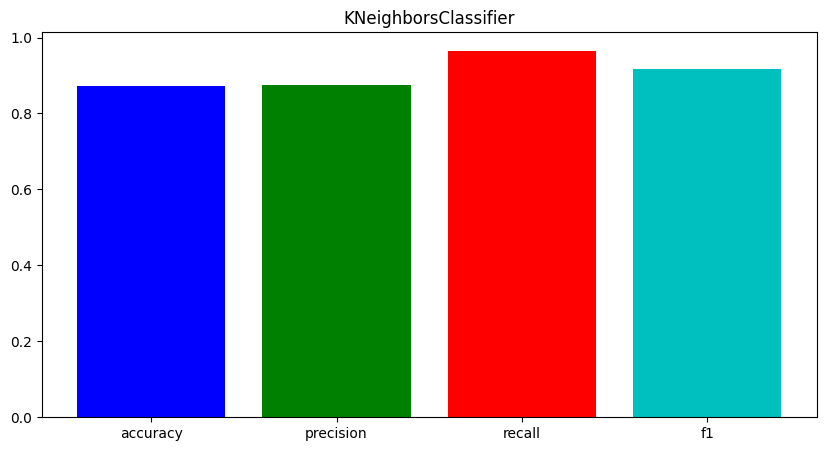

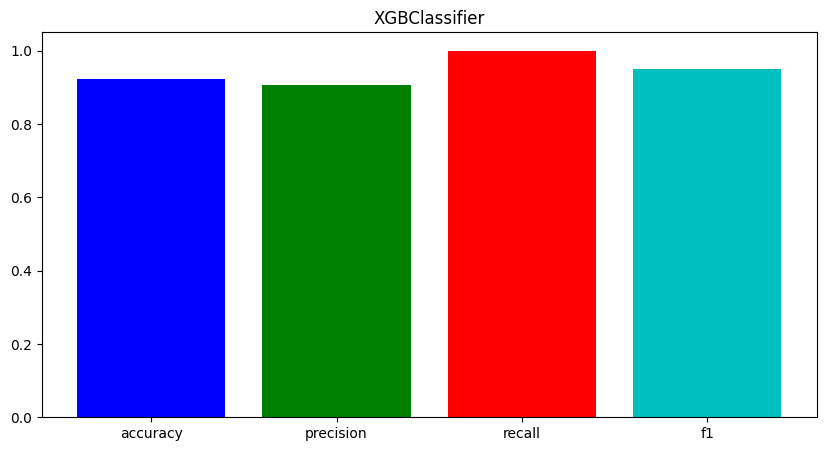

In [117]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def plot_results(results):
    for classifier_name, metrics in results.items():
        plt.figure(figsize=(10,5))
        plt.bar(metrics.keys(), metrics.values(),color=colors)
        plt.title(classifier_name)
        plt.show()

plot_results(results)

# **Comparision Of Accuracy Of Different Classifiers** 

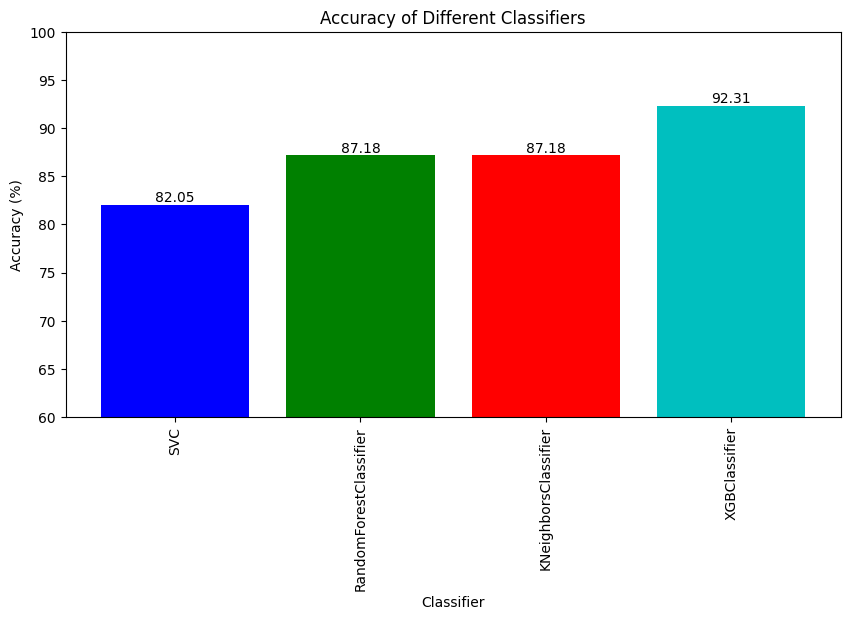

In [118]:
def plot_results(results):
    plt.figure(figsize=(10,5))

    classifier_names = [name for name in results.keys()]
    accuracies = [metrics['accuracy']*100 for metrics in results.values()]

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    bars = plt.bar(classifier_names, accuracies, color = colors)
    plt.title('Accuracy of Different Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy (%)')
    plt.ylim([60, 100])
    plt.xticks(rotation=90)

    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval,va='bottom',ha='center')

    plt.show()

plot_results(results)
